# Project Name: Prediction of Income Levels using Adult Census data.

# Project By: Anuj K. Shinde

In [1]:
# Abstract:
# The goal of the Adult Census Income Prediction Project is to create a machine learning model that uses job and demographic characteristics 
# from the Adult dataset from the U.S. Census Bureau to forecast if an individual's annual income surpasses $50,000. 
# Data preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation are some of the crucial processes in this project. 

# To determine the optimal hyperparameters, a variety of algorithms, including Random Forests, KNeighbor Classifier, Decision Trees, and Logistic Regression, 
# are examined and optimized using methods like GridSearchCV. 
# Metrics including accuracy, precision, recall, and the F1-score are used to assess the performance of the finished model.
# The goal is define the factors influencing income levels while also creating a reliable model for prediction for practical applications in areas like economic planning and policy-making.


In [2]:
# Dataset Information:

# age: continuous – age of a Person

# workclass:The location of an individual's workplace – categorical -Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

# fnlwgtThe Current Population Survey (CPS) determines this weight. Since it is a feature designed to assign similar weights to people with similar demographic characteristics, people with similar demographic features should have similar weights.

# education: Degree the persholdshas – Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

# education-num: no.consecutive of yethat a s a perhas son studied – continuous.

# marital.status: No of people - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

# occupation: people's occupation - Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

# relationship: people's relat with each other ionship- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

# sex: Gender - Female, Male.

# capital.gain: Investment gain of thutside of ther than salary – continuous.

# capital.loss: Loss from investments – continuous.

# hours.per.week: No. of hours aed person works – continuous.

# native country: 

# income: >50K, <=50K (dependent annual variable, the salary($ per year)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading and Displaying Census Data
df = pd.read_csv('Census.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
# Displaying first 5 entries.
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Displaying Summary statistics of data.
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Data Cleaning:

In [7]:
# Giving the entire dataset overview & structure.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking null values in data.
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# Displaying Occupation frequency count.
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

# Professional specialization has been found to be the most popular career choice.

In [10]:
# Displaying workclass frequency count.
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

# Census data shows that 22696 people belong to the category of private class.

In [11]:
# Displaying Country frequency count.
df["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

# The majority of people have the United States as their native country, according to the income data.

In [12]:
#Count of Unique Values in the Income Column
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

# According to the income data, 24,720 people make USD 50,000 or less, while 7,841 people make USD $50,000 or more.

In [13]:
#Count of Unique Values in the Sex Column
df["sex"].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

# According to the sex statistics, the dataset contains 10,771 females and 21,790 males.

In [14]:
#Percentage Distribution of Income Category
income = df["income"].value_counts(normalize = True)   #Returns proportions (fractions) rather than counts.
income*100

income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64

In [15]:
# The data is skewed since only 25% of the data shows persons with salaries over $50k , 
# while 75% of the data shows people with salaries under $50,000, which is represented as 0.

In [16]:
#Counting Unique Values in Each Column
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [17]:
#Determining the Most Frequent Occupation
df["occupation"].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [18]:
#Determining the Most Common Native Country
df["native.country"].mode()

0    United-States
Name: native.country, dtype: object

In [19]:
#Determining Most Frequent Workclass Value
df["workclass"].mode()

0    Private
Name: workclass, dtype: object

# Using the mode to determine the most frequent value, we replaced all occurrences of "?" in the "workclass," "occupation," and "native.country" columns with "Private," "Prof-specialty," and "United-States," respectively.
# The value that occurs most frequently in a set of values is called the mode.

In [20]:
df["workclass"].replace("?","Private",inplace = True)
df["occupation"].replace("?","Prof-specialty",inplace = True)
df["native.country"].replace("?","United-States",inplace = True)

C:\Users\Anuj Shinde\AppData\Local\Temp\ipykernel_20732\2334339732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["workclass"].replace("?","Private",inplace = True)
C:\Users\Anuj Shinde\AppData\Local\Temp\ipykernel_20732\2334339732.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [21]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
#Removing the 'fnlwgt' Column from the Dataset
df.drop(['fnlwgt'],axis = 1,inplace = True)

# Data Visualization:

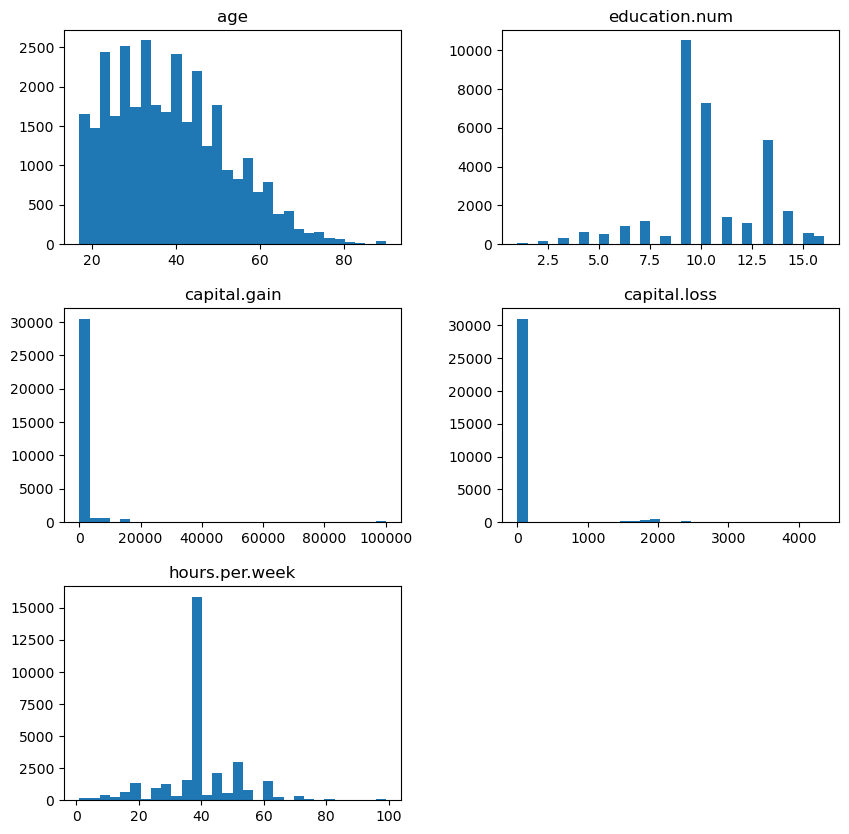

In [23]:
# Plotting histograms of the data
df.hist(figsize = (10,10), grid=False, bins=30)
plt.show()

# age: The dataset's average age is 38 years old, with a wide range of 17 to 90 years.The distribution of ages between 18 and 90 years old is quite broad. 
# The majority of the population is between the ages of 25 and 40, according to the variable's distribution.
# Most people finished eight to twelve years of schooling, according to education.num.
# Capital.gain: When an item (such stocks, real estate, or other investments) is sold for more than its acquisition price.
# The profit (capital-gain) is often between 0 and 100,000 USD.
# The losses incurred when an asset (such stocks, real estate, or other investments) is sold for less than the initial purchase price (capital-loss) often range from 0 to 450 USD.
# Most people worked between thirty and forty hours a week.

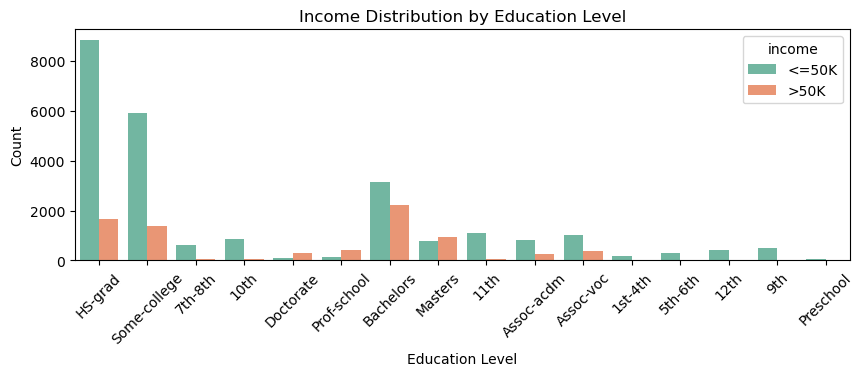

In [24]:
plt.figure(figsize=(10,3))
sns.countplot(x='education', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Anuj Shinde\AppData\Local\Temp\ipykernel_20732\1630818108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workclass', y='hours.per.week', data=df, palette='Set2')


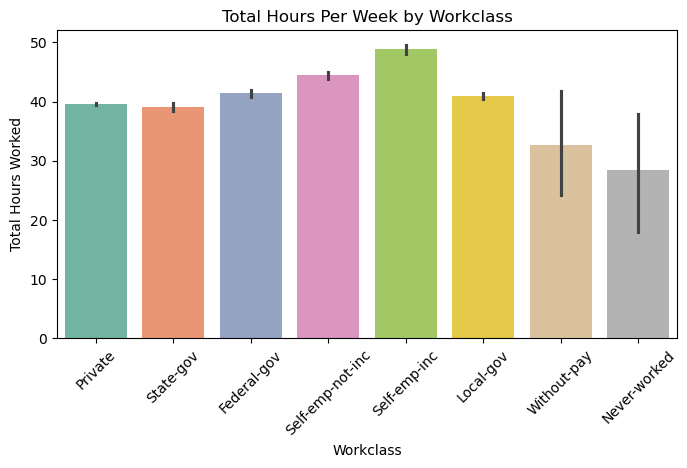

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(x='workclass', y='hours.per.week', data=df, palette='Set2')
plt.title('Total Hours Per Week by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Total Hours Worked')
plt.xticks(rotation=45)
plt.show()

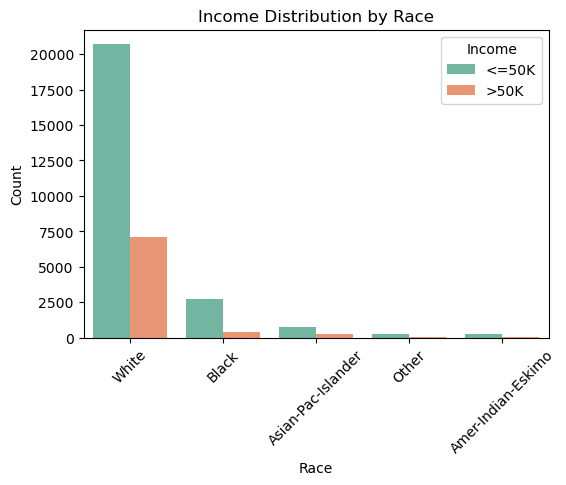

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='race', hue='income', data=df, palette='Set2')
plt.title('Income Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

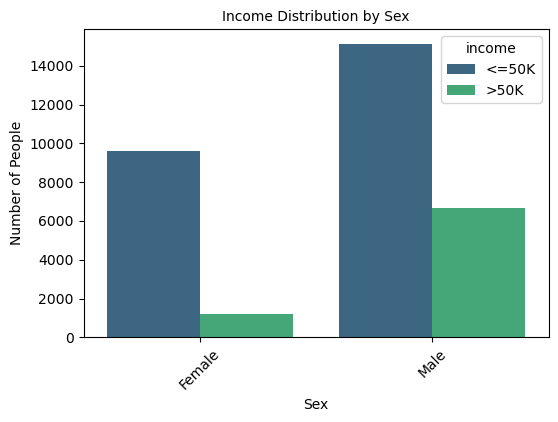

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x="sex", data=df, hue="income", palette="viridis")

# Set plot title and axis labels with customized font sizes
plt.title("Income Distribution by Sex", fontsize=10, color='black')
plt.xlabel("Sex", fontsize=10)
plt.ylabel("Number of People", fontsize=10,)
plt.xticks(rotation=45, fontsize=10)
plt.show()

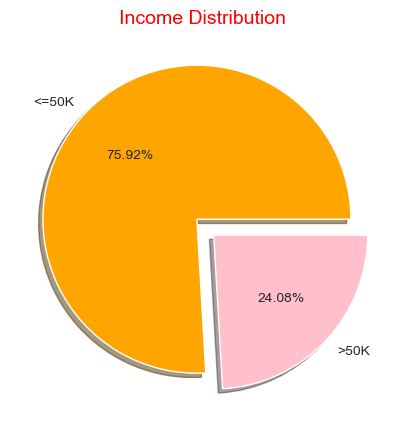

In [28]:
sns.set_style("darkgrid")  
plt.figure(figsize=(5, 5))  

plt.pie(income, 
        labels=["<=50K", ">50K"], 
        autopct='%1.2f%%',  # Display percentage with two decimal places
        explode=[0.05, 0.1],  # Slightly explode both sections
        shadow=True,  # Add shadow effect
        colors=['orange', 'pink'])  # Custom color palette

plt.title('Income Distribution', 
          fontsize=14,  
          color='red')
plt.show()
# Of the employees, 24% make more than $50,000 USD, while 76% make $50,000 USD or less.

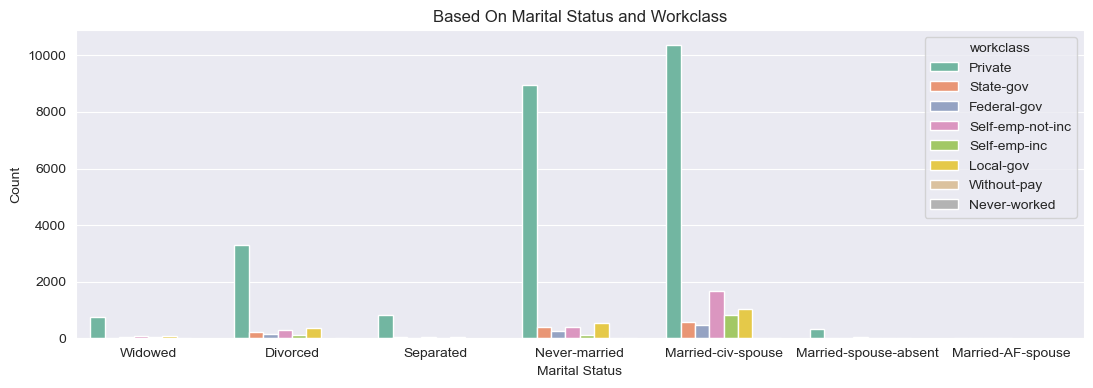

In [29]:
plt.figure(figsize=(13, 4))
sns.countplot(data=df, x="marital.status", hue="workclass", palette="Set2")

# Set the plot title and axis labels
plt.title("Based On Marital Status and Workclass", size=12)
plt.xlabel("Marital Status", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

# The workclass distribution by marital status is shown above. 
# The majority of married civil spouses and singles are employed in the private sector.

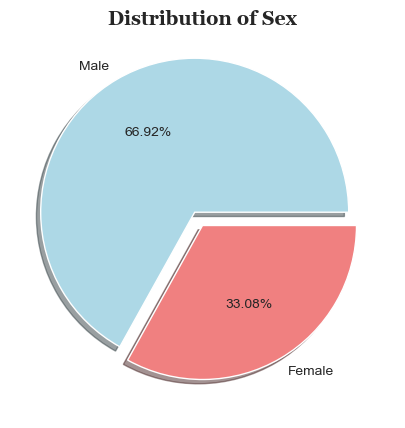

In [30]:
sex_counts = df['sex'].value_counts()

# Set up the figure size
plt.figure(figsize=(8, 5))

plt.pie(sex_counts, 
        labels=sex_counts.index, 
        autopct='%1.2f%%',  # Display percentage with two decimal places
        explode=[0.1, 0],   # Slightly explode the first slice
        colors=['lightblue', 'lightcoral'],  # Custom color palette
        shadow=True)  # Add shadow effect

plt.title("Distribution of Sex", fontdict={"fontname": "Georgia", "fontsize": 14, "fontweight": "bold"})
plt.show()
# From the figures, we can observe that just 33% of employees are female, while 67% of employees are male.

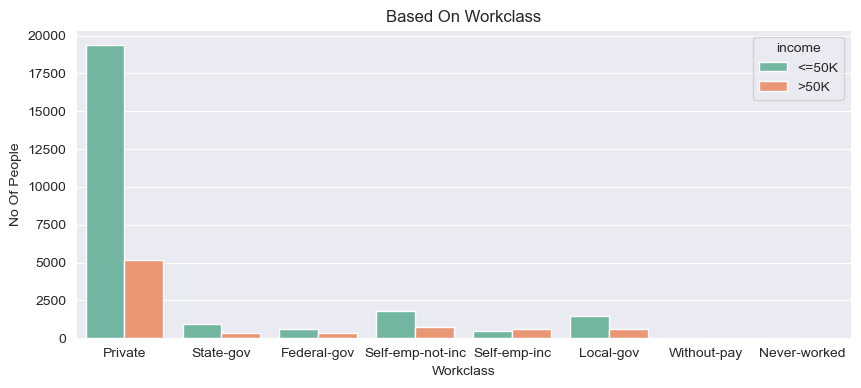

In [31]:
plt.figure(figsize = (10,4))
sns.countplot(data = df,x = "workclass",hue = "income",palette = "Set2")

# Set the plot title and axis labels
plt.title("Based On Workclass",size = 12)
plt.xlabel("Workclass",fontsize = 10)
plt.ylabel("No Of People",fontsize = 10)
plt.show()
# According to the data above, 70% of the working class is employed in the private sector.
# It also has the largest proportion of individuals earning over $50,000 USD.

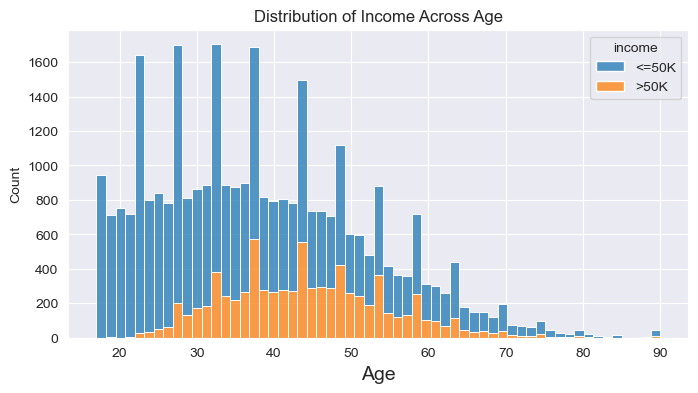

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='income', multiple='stack')
plt.title("Distribution of Income Across Age", fontdict={"fontname": "arial", "fontsize": 12})
plt.xlabel("Age", fontdict={"fontname": "arial", "fontsize": 14})
plt.show()
# We conclude that the majority of people make their minimum wage in their 20s, which is reasonable given that this is when careers begin.
# From this, we may derive that age and income are directly correlated.
# Since very few people continue to work after the age of sixty, the data is left skewed, and the likelihood of a wage exceeding $50,000 is quite low.

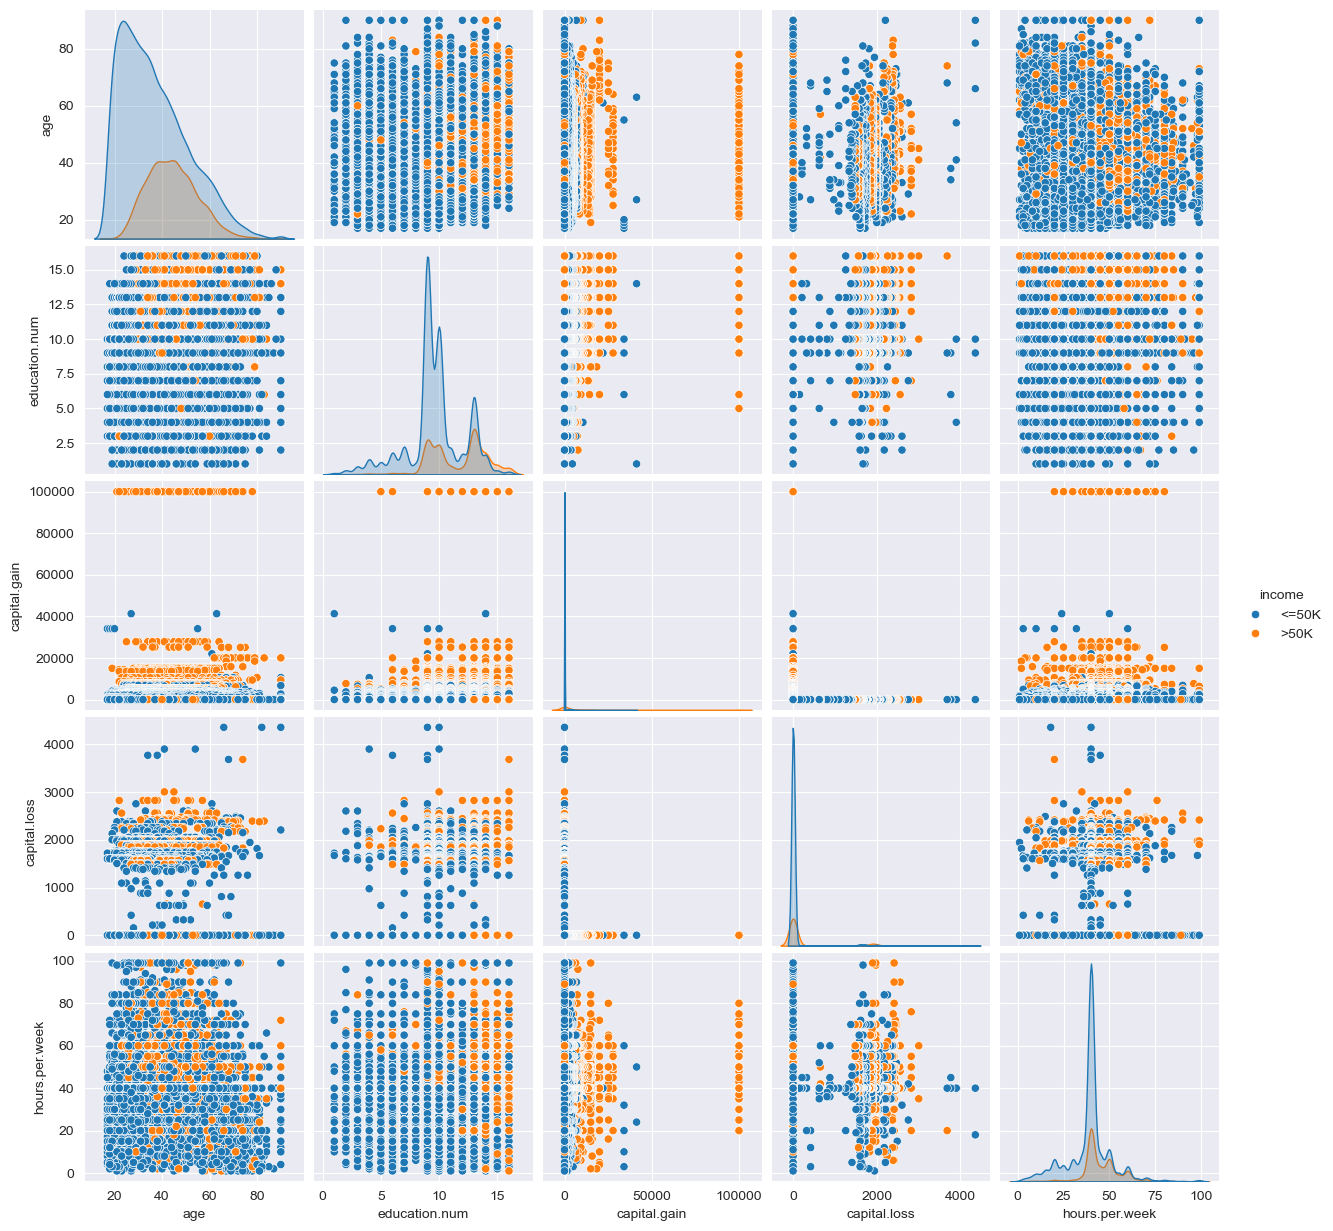

In [33]:
sns.pairplot(data = df, hue = "income")
plt.show()
# We can infer from the above that there is no indication of a linear relationship between the numerical columns.

# Categorizing Numerical & Categorical data:

In [34]:
df_num = df.select_dtypes(['int', 'float'])
df_num

,age,education.num,capital.gain,capital.loss,hours.per.week
0,90,9,0,4356,40
1,82,9,0,4356,18
2,66,10,0,4356,40
3,54,4,0,3900,40
4,41,10,0,3900,40
...,...,...,...,...,...
32556,22,10,0,0,40
32557,27,12,0,0,38
32558,40,9,0,0,40
32559,58,9,0,0,40


In [35]:
df_cat = df.select_dtypes(['object'])
df_cat

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


# Label Encoding:

In [36]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
le = LabelEncoder()

for i in df_cat:
    df_cat[i] = le.fit_transform(df_cat[i])

df_cat

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,11,6,9,1,4,0,38,0
1,3,11,6,3,1,4,0,38,0
2,3,15,6,9,4,2,0,38,0
3,3,5,0,6,4,4,0,38,0
4,3,15,5,9,3,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32556,3,15,4,10,1,4,1,38,0
32557,3,7,2,12,5,4,0,38,0
32558,3,11,2,6,0,4,1,38,1
32559,3,11,6,0,4,4,0,38,0


# Feature Scaling:

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(df_num)
x_scaled

array([[ 3.76961234, -0.42005962, -0.14592048, 10.59350656, -0.03542945],
       [ 3.18311167, -0.42005962, -0.14592048, 10.59350656, -1.81720429],
       [ 2.01011032, -0.03136003, -0.14592048, 10.59350656, -0.03542945],
       ...,
       [ 0.10398314, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       [ 1.42360965, -0.42005962, -0.14592048, -0.21665953, -0.03542945],
       [-1.21564337, -0.42005962, -0.14592048, -0.21665953, -1.65522476]])

In [38]:
# Convert the scaled numerical data back to a DataFrame with original column names
df_num = pd.DataFrame(data = x_scaled,columns = df_num.columns)
df_num.head(5)

,age,education.num,capital.gain,capital.loss,hours.per.week
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429


# In machine learning, feature scaling is a typical preprocessing technique that improves model performance by ensuring that the numerical input is standardized.

# Merging both numerical & categorical data:

In [39]:
df_new = pd.concat([df_num,df_cat],axis = 1)
df_new

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,1,4,0,38,0
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,1,4,0,38,0
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,4,2,0,38,0
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,4,4,0,38,0
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,3,4,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,4,1,38,0
32557,-0.849080,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,5,4,0,38,0
32558,0.103983,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,0,4,1,38,1
32559,1.423610,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,4,4,0,38,0


# Label-encoded categorical data and feature-scaled numerical data have been combined here.This procedure is helpful for preparing data for machine learning or further analysis activities that require the inclusion of both numerical and categorical variables in the same dataset.

# Spliting data into X & Y:

In [40]:
X = df_new.drop(["income"], axis = 1)
X

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,3.769612,-0.420060,-0.14592,10.593507,-0.035429,3,11,6,9,1,4,0,38
1,3.183112,-0.420060,-0.14592,10.593507,-1.817204,3,11,6,3,1,4,0,38
2,2.010110,-0.031360,-0.14592,10.593507,-0.035429,3,15,6,9,4,2,0,38
3,1.130359,-2.363558,-0.14592,9.461864,-0.035429,3,5,0,6,4,4,0,38
4,0.177296,-0.031360,-0.14592,9.461864,-0.035429,3,15,5,9,3,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,-0.031360,-0.14592,-0.216660,-0.035429,3,15,4,10,1,4,1,38
32557,-0.849080,0.746039,-0.14592,-0.216660,-0.197409,3,7,2,12,5,4,0,38
32558,0.103983,-0.420060,-0.14592,-0.216660,-0.035429,3,11,2,6,0,4,1,38
32559,1.423610,-0.420060,-0.14592,-0.216660,-0.035429,3,11,6,0,4,4,0,38


In [41]:
y=df_new['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int32

C:\Users\Anuj Shinde\AppData\Local\Temp\ipykernel_20732\1006663693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "income",data = df,palette = "Set2")


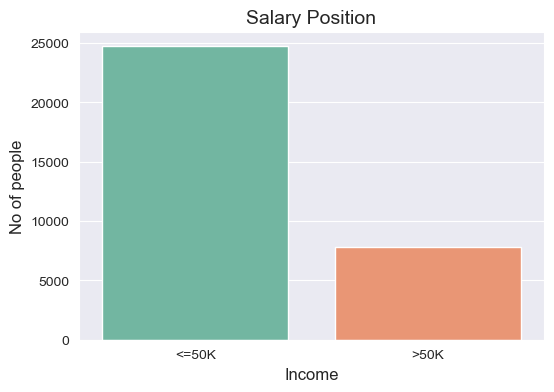

In [42]:
# Create a count plot for the 'income' column 
plt.figure(figsize=(6,4))
sns.countplot(x = "income",data = df,palette = "Set2")

# Set the title and labels for the plot
plt.title("Salary Position",size = 14)
plt.xlabel("Income",size = 12)
plt.ylabel("No of people",size = 12)
plt.show()

In [43]:
# Calculate and format the percentage distribution of the 'income' column
income = df["income"].value_counts(normalize = True)
income_percentage = round(income * 100,2).astype("str") + "%"

print("Percentage Distribution of Income Categories")
print(income_percentage)

Percentage Distribution of Income Categories
income
<=50K    75.92%
>50K     24.08%
Name: proportion, dtype: object


In [44]:
# Of the employees, 75.92% make $50,000  or  less,  while  the remainder 24.08%  make  $50,000 or more. 
# In this case, upsampling is required to eliminate bias in the training model due to the unbalanced data.

# Sampling:

<=50K ---> 0
>50K ----> 1


C:\Users\Anuj Shinde\AppData\Local\Temp\ipykernel_20732\1623184247.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="income", data=y_df, palette="bright")


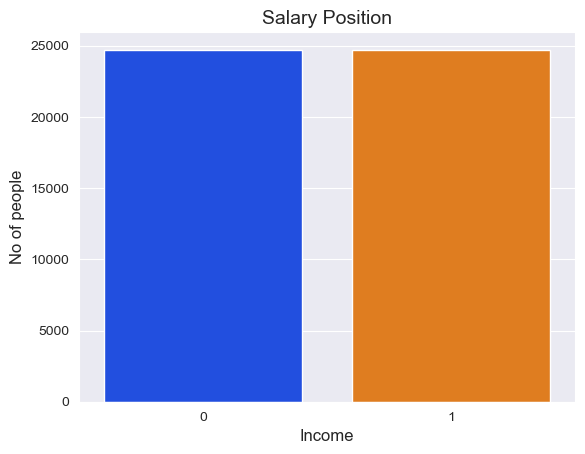

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Perform oversampling to balance the class distribution
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Convert y_ros to a DataFrame for visualization
y_df = pd.DataFrame(y_ros, columns=['income'])

# Display class labels
print("<=50K ---> 0")
print(">50K ----> 1")

# Create a count plot for the 'income' column in the resampled dataset
sns.countplot(x="income", data=y_df, palette="bright")

# Set the title and labels for the plot
plt.title("Salary Position", size=14)
plt.xlabel("Income", size=12)
plt.ylabel("No of people", size=12)
plt.show()


In [46]:
X_ros

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,3.769612,-0.420060,-0.145920,10.593507,-0.035429,3,11,6,9,1,4,0,38
1,3.183112,-0.420060,-0.145920,10.593507,-1.817204,3,11,6,3,1,4,0,38
2,2.010110,-0.031360,-0.145920,10.593507,-0.035429,3,15,6,9,4,2,0,38
3,1.130359,-2.363558,-0.145920,9.461864,-0.035429,3,5,0,6,4,4,0,38
4,0.177296,-0.031360,-0.145920,9.461864,-0.035429,3,15,5,9,3,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,1.130359,1.523438,0.842275,-0.216660,-0.035429,1,12,2,0,0,4,1,38
49436,1.276984,-0.420060,-0.145920,-0.216660,-0.197409,6,11,2,13,0,4,1,38
49437,0.617171,-0.420060,-0.145920,-0.216660,0.612489,3,11,2,6,0,4,1,38
49438,1.203672,0.357340,-0.145920,-0.216660,0.774468,3,8,2,2,0,4,1,17


In [47]:
y_ros

0        0
1        0
2        0
3        0
4        0
        ..
49435    1
49436    1
49437    1
49438    1
49439    1
Name: income, Length: 49440, dtype: int32

In [48]:
# The oversampling procedure has balanced the distribution of income groups, as the above visualization helps to verify.
# Because upsampling helps to maintain the original data and enhances the representation of the minority class without losing important 
# information, we have chosen it over downsampling in this case. 
# However,the particular context of the issue, the size of the dataset and the analysis's objectives should all be taken into consideration 
# while deciding between upsampling and downsampling.

# Model Training:

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X_ros, y_ros, test_size = 0.2,random_state = 42)

In [51]:
# Display the training feature set (X_train)
X_train.head(5)

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
41432,0.323921,-0.031360,-0.14592,-0.21666,0.612489,3,15,2,9,0,4,1,38
16109,-1.288956,-0.031360,-0.14592,-0.21666,2.394264,3,15,4,6,3,4,0,38
40444,0.543859,-0.031360,-0.14592,-0.21666,1.584366,3,15,2,11,0,2,1,38
26927,0.103983,-2.363558,-0.14592,-0.21666,-2.627102,3,5,5,9,1,4,0,38
43968,1.423610,-0.420060,-0.14592,-0.21666,-0.035429,3,11,2,0,5,4,0,38


In [52]:
# Display the training target variable (y_train)
y_train

41432    1
16109    0
40444    1
26927    0
43968    1
        ..
11284    0
44732    1
38158    1
860      1
15795    1
Name: income, Length: 39552, dtype: int32

In [53]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state = 42)
svm = SVC()

In [54]:
def algorithm(model):
    # Train the model on the training data
    model.fit(X_train,y_train)
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    # Print the classification report to evaluate model performance
    print(classification_report(y_test,y_pred))

    # Generate the classification report and convert it into dictionary format
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting accuracy
    accuracy = report['accuracy']*100 
    print(f"Accuracy from Classification Report for {model} : {accuracy:.2f} %")
    
    return model

In [55]:
algorithm(logreg)

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4955
           1       0.77      0.76      0.76      4933

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888

Accuracy from Classification Report for LogisticRegression() : 76.54 %


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
algorithm(knn)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      4955
           1       0.80      0.90      0.85      4933

    accuracy                           0.84      9888
   macro avg       0.84      0.84      0.84      9888
weighted avg       0.84      0.84      0.84      9888

Accuracy from Classification Report for KNeighborsClassifier() : 83.86 %


KNeighborsClassifier()

In [57]:
algorithm(dt)

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      4955
           1       0.86      0.95      0.90      4933

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

Accuracy from Classification Report for DecisionTreeClassifier() : 89.98 %


DecisionTreeClassifier()

In [58]:
algorithm(rf)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4955
           1       0.88      0.96      0.92      4933

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888

Accuracy from Classification Report for RandomForestClassifier(random_state=42) : 91.59 %


RandomForestClassifier(random_state=42)

In [59]:
algorithm(svm)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4955
           1       0.76      0.82      0.79      4933

    accuracy                           0.78      9888
   macro avg       0.78      0.78      0.78      9888
weighted avg       0.78      0.78      0.78      9888

Accuracy from Classification Report for SVC() : 77.88 %


SVC()

# Performing Hyperparameter Tuning using Grid Search CV to enhance the model accuracy.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
#Hyperparameter Grid for Logistic Regression Tuning
grid = {"C": np.logspace(-3,3,7),
        "penalty": ["l1","l2","elasticnet"],
        "solver": ["lbfgs","newton-cg","liblinear","sag","saga"]       
       }

In [62]:
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,verbose = 4)

In [63]:
logreg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[CV 1/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l1, solver=liblinear;, score=0.755 total time=   0.3s
[CV 2/5] END C=0.001, penalty=l1, solv

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.7s
[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.5s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.763 total time=   0.7s
[CV 1/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.2s
[CV 2/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.2s
[CV 3/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.2s
[CV 4/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.2s
[CV 5/5] END C=0.001, penalty=l2, solver=newton-cg;, score=0.763 total time=   0.2s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.765 total time=   0.2s
[CV 2/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.765 total time=   0.3s
[CV 3/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.766 total time=   0.2s
[CV 4/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.764 total time=   0.2s
[CV 5/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.763 total time=   0.2s
[CV 1/5] END ...C=0.001, penalty=l2, solver=sag;, score=0.766 total time=   0.5

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.8s
[CV 1/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.3s
[CV 2/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.770 total time=   0.3s
[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.770 total time=   0.3s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.3s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.767 total time=   0.3s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.767 total time=   0.3s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.769 total time=   0.3s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.771 total time=   0.4s
[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.766 total time=   0.3s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.766 total time=   0.3s
[CV 1/5] END ....C=0.01, penalty=l2, solver=sag;, score=0.767 total time=   0.6s
[CV 2/5]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s
[CV 1/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.4s
[CV 2/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.4s
[CV 3/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.5s
[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.4s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.5s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.768 total time=   0.5s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.770 total time=   0.4s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.771 total time=   0.5s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.765 total time=   0.5s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.766 total time=   0.5s
[CV 1/5] END .....C=0.1, penalty=l2, solver=sag;, score=0.768 total time=   0.6s
[CV 2/5] END .....

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.767 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.7s
[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.5s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.4s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.4s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.4s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.5s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.768 total time=   0.5s
[CV 2/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.771 total time=   0.5s
[CV 3/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.772 total time=   0.5s
[CV 4/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.4s
[CV 5/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END .....C=1.0, penalty=l2, solver=sag;, score=0.769 total time=   0.7s
[CV 2/5] END .....

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.770 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..C=10.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s
[CV 1/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.4s
[CV 2/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.4s
[CV 3/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.4s
[CV 4/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.4s
[CV 5/5] END C=10.0, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.5s
[CV 1/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.768 total time=   0.5s
[CV 2/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.771 total time=   0.5s
[CV 3/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.772 total time=   0.5s
[CV 4/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.765 total time=   0.4s
[CV 5/5] END C=10.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.4s
[CV 1/5] END ....C=10.0, penalty=l2, solver=sag;, score=0.768 total time=   0.7s
[CV 2/5]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .C=100.0, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.7s
[CV 1/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.5s
[CV 2/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.4s
[CV 3/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.4s
[CV 4/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.4s
[CV 5/5] END C=100.0, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.5s
[CV 1/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.768 total time=   0.5s
[CV 2/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.771 total time=   0.5s
[CV 3/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.772 total time=   0.5s
[CV 4/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.765 total time=   0.4s
[CV 5/5] END C=100.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.5s
[CV 1/5] END ...C=100.0, penalty=l2, solver=sag;, score=0.768 total time=   0.7

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.769 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.774 total time=   0.7s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.8s


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=1000.0, penalty=l2, solver=lbfgs;, score=0.765 total time=   0.7s
[CV 1/5] END C=1000.0, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.4s
[CV 2/5] END C=1000.0, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.4s
[CV 3/5] END C=1000.0, penalty=l2, solver=newton-cg;, score=0.772 total time=   0.4s
[CV 4/5] END C=1000.0, penalty=l2, solver=newton-cg;, score=0.765 total time=   0.4s
[CV 5/5] END C=1000.0, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.5s
[CV 1/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.768 total time=   0.5s
[CV 2/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.771 total time=   0.5s
[CV 3/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.772 total time=   0.5s
[CV 4/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.765 total time=   0.4s
[CV 5/5] END C=1000.0, penalty=l2, solver=liblinear;, score=0.766 total time=   0.5s
[CV 1/5] END ..C=1000.0, penalty=l2, solver=sag;, score=0.768 total t

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=4)

In [64]:
#Displaying Best Parameters from Grid Search:
print("Best_params result :",logreg_cv.best_params_)

Best_params result : {'C': 10.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [65]:
logistic = LogisticRegression(C = 10.0,penalty = "l2",solver = "newton-cg")

logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4955
           1       0.77      0.76      0.77      4933

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888



# K- Neighbors Classifier Using Grid Search CV:

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Range of values for the number of neighbors
k_range = list(range(1,10))

# Parameter grid for GridSearchCV
param_grid = dict(n_neighbors = k_range)

In [67]:
# Initialize GridSearchCV for tuning K-Nearest Neighbors hyperparameters
grid = GridSearchCV(knn,param_grid,cv = 10,scoring = "accuracy",return_train_score = False,verbose = 1)

In [68]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=1)

In [69]:
print("Best_params result :",grid.best_params_)

Best_params result : {'n_neighbors': 1}


In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      4955
           1       0.86      0.94      0.90      4933

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888



# Decision Tree Algorithm using Grid Search CV:

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
# Define the parameter grid for tuning Decision Tree hyperparameters
param_grid = { "max_depth" : ["none",10,20,30],             # Maximum depth of the tree
               "min_samples_split" : [2,5,10],              # Minimum number of samples required to split an internal node
               "min_samples_leaf" : [1,2,4],                # Minimum number of samples required to be at a leaf node
               "max_features" : ["auto","sqrt","log2"],     # Number of features to consider when looking for the best split
               "criterion": ["gini","entropy"]              # Function to measure the quality of a split
             }

In [73]:
gs = GridSearchCV(dt,param_grid,cv = 5,verbose = 4)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=none, max_features=auto, min_samples_leaf=1, min_samples_split=5;, score=nan total time

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['none', 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=4)

In [74]:
print("Best_params result :",gs.best_params_)

Best_params result : {'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [75]:
dt = DecisionTreeClassifier(criterion = "entropy",max_depth = 30,max_features = "log2",min_samples_leaf = 1,min_samples_split = 2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4955
           1       0.85      0.95      0.90      4933

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.89      9888
weighted avg       0.90      0.90      0.89      9888



# Random Forest using Grid Search CV:

In [76]:
#Number of trees in random forest
n_estimators = [20,60,100,120]

#Number of features to consider at every split
max_features = [0.2,0.6,1.0]

#Maximum number of levels in tree
max_depth = [2,8,None]

#Number of samples
max_samples = [0.5,0.75,1.0]

In [77]:
param_grid = {"n_estimators": n_estimators,
              "max_features" : max_features,
              "max_depth" : max_depth,
              "max_samples" : max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [78]:
rf = RandomForestClassifier()

In [79]:
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1)

In [80]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [81]:
print("Best_params result :",rf_grid.best_params_)

Best_params result : {'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 100}


In [82]:
# Train a Random Forest classifier with specific hyperparameters, make predictions, and print the classification report
rf = RandomForestClassifier(max_depth = None, max_features = 0.2 ,max_samples = 1.0, n_estimators = 120)

# Fit the Random Forest model to the training data
rf.fit(X_train,y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4955
           1       0.88      0.96      0.92      4933

    accuracy                           0.92      9888
   macro avg       0.92      0.92      0.92      9888
weighted avg       0.92      0.92      0.92      9888



In [83]:
algorithm(svm)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4955
           1       0.76      0.82      0.79      4933

    accuracy                           0.78      9888
   macro avg       0.78      0.78      0.78      9888
weighted avg       0.78      0.78      0.78      9888

Accuracy from Classification Report for SVC() : 77.88 %


SVC()

In [84]:
accuracy_data = {
    "Algorithm": ["Logistic Regression", "K Neighbors Classifier", "Decision Tree Classifier", "RandomForestClassifier", "Support Vector Classifier"],
    "Accuracy": [77.18, 90.16, 89.10, 92.1, 77.88]
}

# Creating the DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

#displaying dataframe
accuracy_df

,Algorithm,Accuracy
0,Logistic Regression,77.18
1,K Neighbors Classifier,90.16
2,Decision Tree Classifier,89.10
3,RandomForestClassifier,92.10
4,Support Vector Classifier,77.88


# With a score of 92.10%, the Random Forest Classifier has the highest accuracy, according to the data above. This suggests that, for the specified dataset, the Random Forest algorithm outperforms the others listed. 


# With a score of 77.18%, logistic regression has the lowest accuracy. This implies that, for this dataset, it is the least successful model in this comparison.

In [85]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [ ]:
import numpy as np
import joblib  # To load the trained model

# Prompt user for input features
age = float(input('Please enter age: '))
education_num = float(input('Please enter education num:'))
capital_gain = float(input('Please enter capital gain:'))
capital_loss = float(input('Please enter capital loss:'))
hours_per_week = float(input('Please enter hours worked per week:'))
workclass = int(input('Please enter workclass:'))
education = int(input('Please enter education level:'))
marital_status = int(input('Please enter marital status:'))
occupation = int(input('Please enter occupation:'))
relationship = int(input('Please enter relationship:'))
race = int(input('Please enter race:'))
sex = int(input('Please enter sex (1=Male, 2=Female):'))
native_country = int(input('Please enter native country:'))

# Prepare the input feature array
user_input = np.array([age, education_num, capital_gain, capital_loss, hours_per_week, workclass, education, marital_status,
                       occupation, relationship, race, sex, native_country]).reshape(1, -1)

# Make prediction
prediction = rf.predict(user_input)

# Interpret the prediction
if prediction == 0:
    print('Predicted Income: ≤50K')
else:
    print('Predicted Income: >50K')